# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [8]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = bs(html, "html.parser")
mars_soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [19]:
# Extract all rows of data
table_elements = mars_soup.find_all("tr", class_="data-row")
table_elements

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [24]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for row in table_elements:
    cell_values = row.find_all("td")
    values = []
    for value in cell_values:
        values.append(value.text)
    data_rows.append(values)

data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a DataFrame from the list of rows
mars_weather_df = pd.DataFrame(data_rows, columns=column_names)

# Display the DataFrame to verify the data
print(mars_weather_df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


In [26]:
# Confirm DataFrame was created successfully
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [28]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [29]:
# Change data types for data analysis
# Display the current data types of the DataFrame
print(mars_weather_df.dtypes)

# Convert 'terrestrial_date' to datetime
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert 'sol', 'ls', 'month' to integers
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to floats
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Display the updated data types to confirm changes
print(mars_weather_df.dtypes)

# Display the first few rows to verify data integrity
print(mars_weather_df.head())

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object
   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [30]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [31]:
# 1. How many months are there on Mars?
mars_weather_df['month'].max()

12

In [35]:
# 2. How many Martian days' worth of data are there?
# Calculate the total number of data entries in the DataFrame
total_entries = len(mars_weather_df)

# Determine the maximum and minimum recorded sol values
max_sol_value = mars_weather_df["sol"].max()
min_sol_value = mars_weather_df["sol"].min()

# Compute the range of Martian days (sols) by subtracting the minimum from the maximum
number_of_mars_days = max_sol_value - min_sol_value

# Print the results
print(f"Total number of data entries: {total_entries}")
print(f"Maximum recorded sol value: {max_sol_value}")
print(f"Minimum recorded sol value: {min_sol_value}")
print(f"Number of Martian days covered (excluding 100 missing entries): {number_of_mars_days}")

Total number of data entries: 1867
Maximum recorded sol value: 1977
Minimum recorded sol value: 10
Number of Martian days covered (excluding 100 missing entries): 1967


In [37]:
# 3. What is the average low temperature by month?
# Compute the average minimum temperature for each Martian month
average_min_temp_per_month = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the average temperatures
average_min_temp_per_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

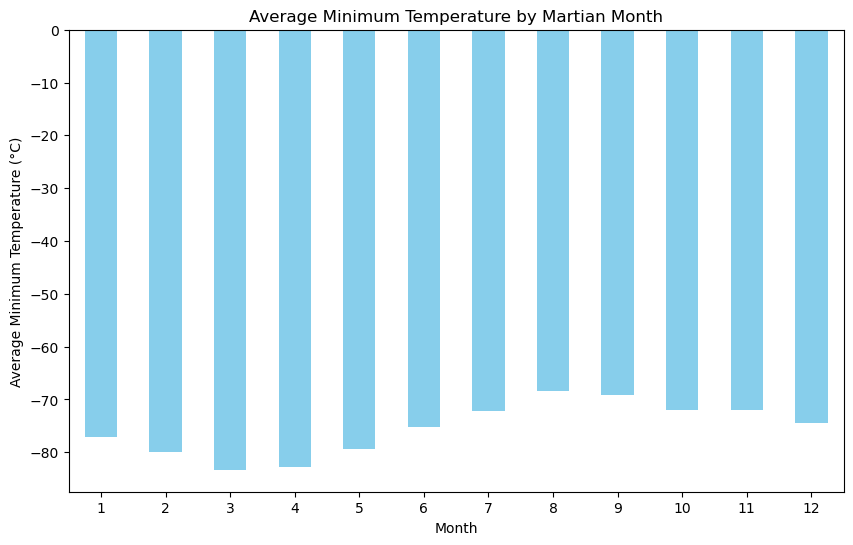

In [40]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_min_temp_per_month.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [41]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest month minimum average temperature
coldest_month = average_min_temp_per_month.idxmin()
coldest_month_temp = average_min_temp_per_month.min()

# Find the hottest month maximum average temperature
hottest_month = average_min_temp_per_month.idxmax()
hottest_month_temp = average_min_temp_per_month.max()

# Print the results
print(f"The coldest month is {coldest_month} with an average minimum temperature of {coldest_month_temp} °C.")
print(f"The hottest month is {hottest_month} with an average minimum temperature of {hottest_month_temp} °C.")

The coldest month is 3 with an average minimum temperature of -83.30729166666667 °C.
The hottest month is 8 with an average minimum temperature of -68.38297872340425 °C.


In [44]:
# 4. Average pressure by Martian month
avg_pressure_monthly = mars_weather_df["pressure"].groupby(mars_weather_df["month"]).mean()
avg_pressure_monthly

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

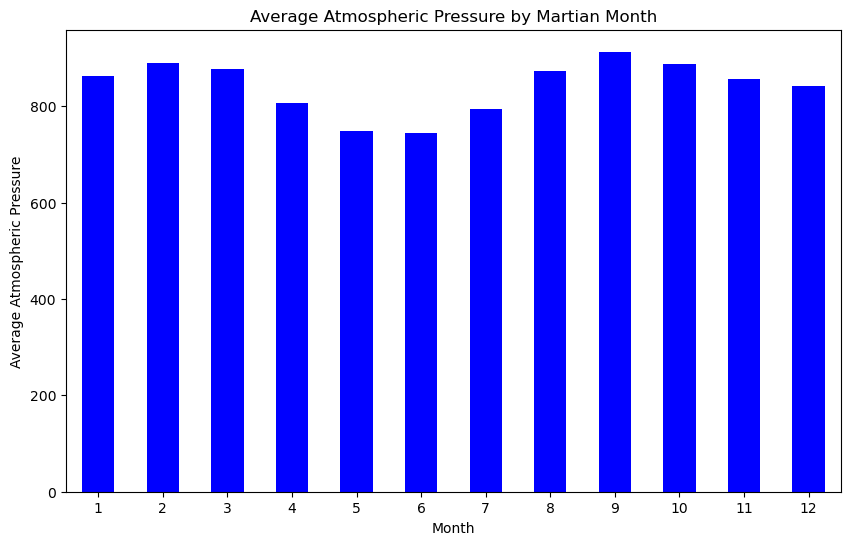

In [47]:
# Plot the average pressure by month
average_pressure_per_month = mars_weather_df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure_per_month.plot(kind='bar', color='blue')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()

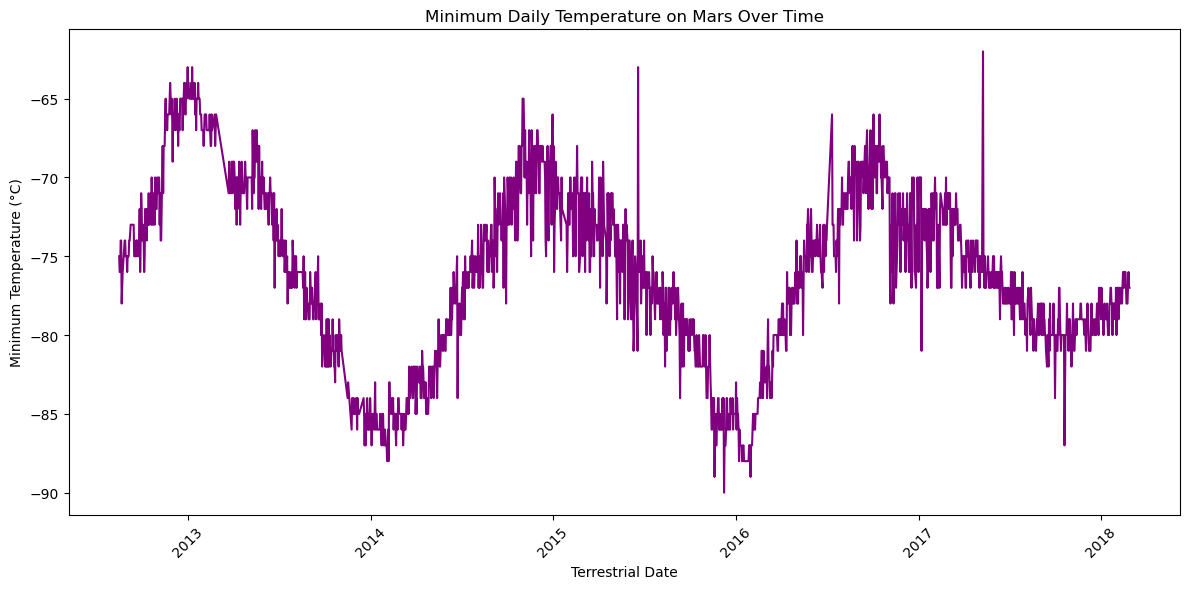

Estimate the number of terrestrial (Earth) days in a Martian year by observing the repeating pattern in the plot.


In [75]:
# 5. How many terrestrial (earth) days are there in a Martian year?
if 'terrestrial_date' in mars_weather_df.index.names:
    # Plot the minimum daily temperature over time
    plt.figure(figsize=(12, 6))
    plt.plot(mars_weather_df.index, mars_weather_df['min_temp'], color='purple')
    plt.title('Minimum Daily Temperature on Mars Over Time')
    plt.xlabel('Terrestrial Date')
    plt.ylabel('Minimum Temperature (°C)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to make room for rotated labels
    plt.show()

    # Print instructions for estimating Martian year length
    print("Estimate the number of terrestrial (Earth) days in a Martian year by observing the repeating pattern in the plot.")
else:
    print("The index is not set to 'terrestrial_date'. Please check the DataFrame setup.")

In [77]:
mars_weather_df

,id,sol,ls,month,min_temp,pressure
terrestrial_date,,,,,,
2012-08-16,2,10,155,6,-75.0,739.0
2012-08-17,13,11,156,6,-76.0,740.0
2012-08-18,24,12,156,6,-76.0,741.0
2012-08-19,35,13,157,6,-74.0,732.0
2012-08-20,46,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
2018-02-23,1889,1973,133,5,-78.0,730.0
2018-02-24,1892,1974,134,5,-77.0,729.0
2018-02-25,1894,1975,134,5,-76.0,729.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [49]:
# Write the data to a CSV
output_path = "mars_data.csv"
mars_weather_df.to_csv(output_path)

In [ ]:
browser.quit()